# Gym Analysis

## Introduction

I've always been intrigued by tracking my progress in various aspects of life, particularly when it comes to sports. This project serves as a medium to satiate my curiosity and to develop my data analysis skills through a personal endeavor.

### Sports Background

Throughout my life, I've always engaged in some form of sport. The last time I went regularly to the gym was in 2017, when I already maintained a notebook to record my lifts. Before January 2022, I worked at a physically demanding job and pursued climbing for five years, attending climbing sessions anywhere from once to five times per week, depending on my schedule. When my contract ended in January 2022, I decided to focus on building muscle mass (which wasn't achievable through climbing alone) and returned to the gym after a 5-year hiatus. I began consistently attending the gym in January 2022, but didn't start tracking my progress until March 2022, as I was getting reacquainted with exercising in that setting. I continued to visit the climbing gym between one and two times per week until November 2022, when I decided to fully concentrate on the gym.

### Project Goals

Since starting my fitness journey, I have changed my workout routine twice. However, some exercises have remained consistent throughout my routines, appearing in at least two of them. These exercises, often referred to as the "Big 5" or "Golden 5," can serve as an accurate representation of someone's overall strength: Squats, Deadlifts, Bench Press, Military Press, and Pull-Ups. The primary goal of this project is to track and analyze my performance in these lifts. Additionally, I plan to study other aspects of my workouts and fitness status, such as my weight, time spent in the gym, and other related factors.

## Results

In this section, I'll display the results obtained from the analysis. The detailed process and code behind these results will be explained later in this notebook.

Let's first run the scripts containing the code to generate the plots:

### Calendar

Here is a calendar highlighting the days when I went to the gym. Each colour represents the 3 different workout routines.

In [ ]:
%run calendar_script.py

### Weight

Now let's check the evolution of my bodyweight over time (currently starting a cut).

In [ ]:
%run weight_script.py

### Workout time

The following plot shows the average duration of each workout from the 2nd and 3rd routines.

In [ ]:
%run time_script.py

### Deadlift
Let's start with the big lifts. The formula I've used to calculate my 1RM (1 rep max) is called the Epley Formula, in honor of the guy who came up with it. Epley's formula is: $$RM = ((\frac{reps}{30}) + 1) \times weight$$
It's pretty accurate when the reps are low, but it should be taken with a grain of salt. The following script shows the results corresponding to the deadlift, the king of all lifts:


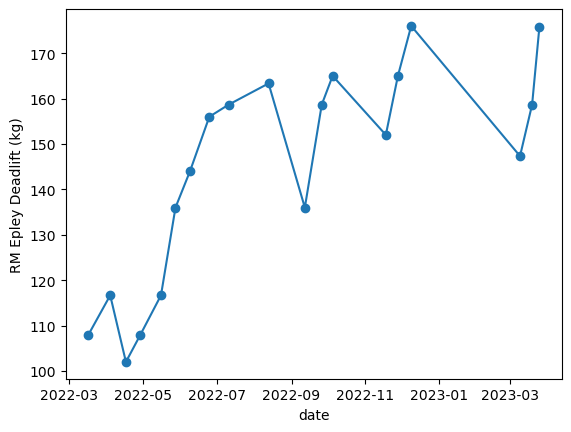

In [18]:
%run deadlift_script.py

### Squat
If the deadlift is the king, the squat must be the queen (to be honest, I just like deadlifting more than squatting, as you can see below). Like with the deadlift, I'll be using the Epley Formula to estimate the 1RM for the following lifts.



In [ ]:
%run squat_script.py

### Bench Press
Next, we have the bench press, yours and everybody's favorite exercise.

In [ ]:
%run benchpress_script.py

### Military Press
In the 4th position, we have the Military Press, the exercise that makes you feel like Hercules holding the world.


In [ ]:
%run militarypress_script.py

### Pull-Ups
Last but not least, the Pull-Ups. Here, I had to modify Epley's formula because it doesn't apply to bodyweight exercises. I'll look into better ways of calculating 1 RM max for Pull-Ups in the future.


In [ ]:
%run pullups_script.py

# WORK IN PROGRESS

## Data Collection & Organization

To extract all the data for this project, I'll be utilizing five sheets from my Excel file:

1. Three sheets correspond to the tables for each workout routine.
2. One sheet is dedicated to tracking my weight.
3. The final sheet records the days I worked out but didn't follow any specific routine (usually due to sickness, vacations, or a busy schedule).

As illustrated in the snapshot below, each sheet contains a table for each day of the program. In each table, there are designated spaces to record the weight lifted and reps performed for each series of a specific exercise. Additionally, there's an empty cell to write any noteworthy observations. Each workout's corresponding date and duration (tracked starting from the second routine) are also recorded.

![Excel Snapshot](excelsnapshot.png")


## Data Import & Cleaning

The messiest aspect of this analysis is extracting the desired data from an unorganized database. For every exercise, I create a DataFrame with the weight, reps of the top series, and the corresponding date. The location of the exercise cell varies across sheets, and for some exercises, they appear on different days within the same workout routine. It's also worth noting that I use Google Drive to store the original file so I can update it while using my phone at the gym. 

After performing all the necessary (and some unnecessary) operations, I obtained the following information to be used in further analysis:

- `dates_i` lists: These lists contain the dates for every day I went to the gym, with each `i` representing the routine I was following.
- `t_i`: These lists store the time I spent doing each workout. There are six lists for the second routine (as it was divided into six different days) and five lists for the third routine.
- For each of the five exercises I wanted to analyze, there are three relevant lists: one for the weight used, one for the reps completed, and one for the date.

Now, let's take a look at the code I used to accomplish this:

In [1]:
# Needed libraries used along the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calmap

path="G:\Mi unidad\Rutina.xlsx"

# The second workout routine I followed (closed)
df_1 = pd.read_excel(path,header=None,sheet_name="Rutina2")
# The first workout routine I followed (closed)
df_2 = pd.read_excel(path,header=None,sheet_name="Rutina Bazman")
# Here I upload my bodyweight
df_3 = pd.read_excel(path,header=None,sheet_name="Peso")
# The current workout routine that I'm following
df_4 = pd.read_excel(path,header=None,sheet_name="Rutina 3")
# Days that I was sick but didn't follow the 2nd routine
df_5 = pd.read_excel(path,header=None,sheet_name="Dias Sueltos")
# It's more confortable for me to use "," instead of "." on my phone so let's replace them:
df_1 = df_1.replace(',', '.', regex=True)
df_2 = df_2.replace(',', '.', regex=True)
df_3 = df_3.replace(',', '.', regex=True)
df_4 = df_4.replace(',', '.', regex=True)
df_5 = df_5.replace(',', '.', regex=True)

Here I select the rows containing the dates corresponding to each workout and put the results into lists:

In [3]:
#Rutina Bazman
dates_1 = df_2.iloc[[1,22,47,68,88,111,134],3:]
unique_col_1 = dates_1.stack()
unique_col_1.reset_index(drop=True, inplace=True)
dates_1 = pd.to_datetime(unique_col_1, format='%Y-%m-%d %H:%M:%S').dt.date.tolist()
#Rutina 2
dates_2 = df_1.iloc[[3,26,55,78,104,128],3:]
unique_col_2 = dates_2.stack()
unique_col_2.reset_index(drop=True, inplace=True)
dates_2 = pd.to_datetime(unique_col_2, format='%Y-%m-%d %H:%M:%S').dt.date.tolist()
#Rutina Actual
dates_3 = df_4.iloc[[3,26,55,78,102],3:]
unique_col_3 = dates_3.stack()
unique_col_3.reset_index(drop=True, inplace=True)
dates_3 = pd.to_datetime(unique_col_3, format='%Y-%m-%d %H:%M:%S').dt.date.tolist()
#Días Sueltos
dates_4 = df_5.iloc[8,2:]
dates_4=dates_4.dropna(axis=0, how='any')
unique_col_4 = dates_4.to_frame().stack()
unique_col_4.reset_index(drop=True, inplace=True)
dates_4 = pd.to_datetime(unique_col_4, format='%Y-%m-%d %H:%M:%S').dt.date.tolist()

In the following calendar it's shown what days I went to the gym. The colours represent each workout routine

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot:ylabel='2022'>, <AxesSubplot:ylabel='2023'>],
       dtype=object))

<Figure size 10000x6000 with 0 Axes>

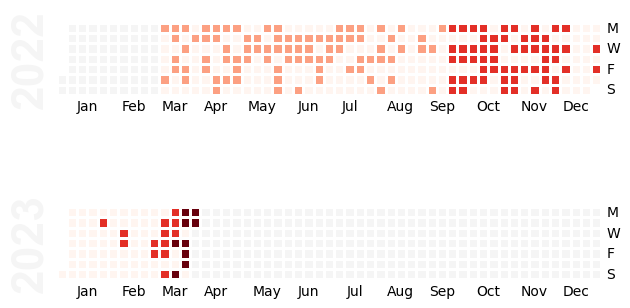

In [4]:
#Mapa de Calor

# Let's merge this 2 cause they correspond to the same time period
dates_2_4=dates_2+dates_4

# Creamos una lista con los valores de las fechas y sus respectivos valores
all_dates = dates_1 + dates_2_4 + dates_3 
all_values = [1] * len(dates_1) + [2] * len(dates_2_4) + [3] * len(dates_3)

# Creamos una serie de Pandas con los valores y las fechas correspondientes
events = pd.Series(all_values, index=pd.to_datetime(all_dates))

# Modificamos el tamaño de la figura
plt.figure(figsize=(100, 60))

# Llamamos a la función calmap.calendarplot() con la serie creada
calmap.calendarplot(events, daylabels='MTWTFSS',dayticks=[0, 2, 4, 6])